# Food Map

# Summary

# Motivation

# Imported Libraries

In [1]:
from src.all_functions import *
from src.communities.communities import *

In [2]:
import _pickle as pickle
#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

In [3]:
from collections import Counter, defaultdict, OrderedDict
import itertools
import operator
from operator import itemgetter

In [4]:
import networkx as nx
import pandas as pd
pd.set_option('display.max_rows', 100)

In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Webscraping FlavorDB

In [6]:
import requests
from bs4 import BeautifulSoup
import re

In [7]:
pg_num = 10 #https://cosylab.iiitd.edu.in/flavordb/entity_details?id=10
#Request each ingredient page using pg_num variable
flavor_db_webpage =requests.get('https://cosylab.iiitd.edu.in/flavordb/entity_details?id={}'.format(pg_num))

#Soup object accesses the HTML of the Request object
soup = BeautifulSoup(flavor_db_webpage.text, 'html.parser')

#Scrape the ingredient name
ingredient_name = str(soup.find('h1', class_='text-primary text-capitalize').text).strip()

#Scrape the category name
category_name = str(soup.find('span', class_='text-capitalize').text).strip()

#Acess the table (https://stackoverflow.com/questions/23377533/python-beautifulsoup-parsing-table)
molecule_table = soup.find('table', id= 'molecules')
table_body = molecule_table.find('tbody')

#initiating a list for each molecule variable    
list_molecule_names = []
list_molecule_id = []
list_molecule_flavor = []

#Access every row in the table 
for row in table_body.find_all('tr'):
    #Access molecule name, id, and flavor in each row
    molecule_name = row.findAll('td')[0].text.strip()
    molecule_id = row.findAll('td')[1].text.strip()
    molecule_flavor = row.findAll('td')[2].text.strip().split(",")
    list_molecule_names.append(molecule_name)
    list_molecule_id.append(molecule_id)
    list_molecule_flavor.append(molecule_flavor)


print(ingredient_name)
print(category_name)
print(list_molecule_names)

Bantu Beer
Beverage Alcoholic
['1-octanol', 'Phenethyl acetate', 'Pentanal', 'Propionaldehyde', '1-Phenyl-1-propanol', '2-Methylbutyl Acetate', 'dimethyl sulfide', 'benzaldehyde', '2-Acetylpyridine', 'Methyl tetradecanoate', '2-Methyl-1-propanol', 'Isobutyl Acetate', 'Oxirane']


# Webscraping Recipe Puppy API

In [8]:
import requests
from bs4 import BeautifulSoup
import re

In [9]:
ingredient = "tuna" #http://www.recipepuppy.com/?i=tuna&q= 
ing_for_url = "+".join(ingredient.split()).lower()
ingredient_name = ingredient.strip().lower()

In [10]:
url = "http://www.recipepuppy.com/?i={}&q={}".format(ing_for_url, ing_for_url)
recipe_puppy_page = requests.get(url)
soup = BeautifulSoup(recipe_puppy_page.text, 'html.parser')

In [11]:
for result in soup.findAll('div', class_ = "result"):
    result_h3 = result.find('h3')

    #name of the result 
    result_name = result_h3.text.strip()
    # print(result_name)

    #link of the result
    result_link = re.findall(r'\"(.+?)\"', str(result_h3))[0].strip()
    # print(result_link)

    #a list of all the ingredients in a recipe
    result_ing_list = [ingredient_name]
    for recipe_ing in result.find('div', class_ = "ings").findAll('a'):
        recipe_ing_name = recipe_ing.text.strip("+").strip()
        result_ing_list.append(recipe_ing_name)
    result_ing_list.sort()

    print(ingredient_name)
    print(result_name)
    print(result_link)
    print(result_ing_list)
    break

tuna
Carpaccio Of Tuna With Seared Tuna Cube And Tuna Tartar Recipe
http://cookeatshare.com/recipes/carpaccio-of-tuna-with-seared-tuna-cube-and-tuna-tartar-100762
['avocado', 'blood orange', 'chips', 'chives', 'cornmeal', 'cracked black pepper', 'cucumber', 'ginger', 'hot sauce', 'lemon juice', 'mango', 'mint', 'olive oil', 'parsley', 'poppy seeds', 'salt', 'shallot', 'tuna', 'vegetable oil', 'watercress']


# FlavorDB

In [12]:
pickle_in = open("./data/pandas/flavorDB_pandas.pickle","rb")

#Getting the dictionary from the pickle
flavorDB = pickle.load(pickle_in)

In [13]:
flavorDB.head()

,_id,category,flavor_of_molecules,ingredient,molecule_IDs,molecules,set_molecules,set_molecules_ID,molecule_quantity
0,5ca27b8f13218a1eabac63d6,Animal Product,"[[faint], [very strong, mothball, animal, f...",egg,"[6322, 6736, 31252, 7909, 7284, 7501, 9609, 12...","[L-arginine, 3-Methylindole, 2,5-Dimethylpyraz...","{betaine, Thiamine Hydrochloride, Pyrazine, L-...","{2879, 5311110, 7895, 3776, 7976, 379, 6140, 3...",55
51,5ca27bd713218a1eabac6409,Cereal,"[[sweet, new mown hay, green, tonka, bitte...",barley,"[323, 7150, 8468, 11509, 637566, 12748, 439341...","[coumarin, Methyl Benzoate, Vanillic acid, 3-H...","{betaine, Geranyl Acetate, 2-Ethyl-5-Methylpyr...","{31268, 4788, 61503, 768, 1889, 6184, 1183, 63...",141
52,5ca27bd913218a1eabac640a,Cereal,"[[solvent, bread, buttery, sweet, nutty], ...",crispbread,"[18522, 12170, 8858, 5283324, 6202, 798, 8094,...","[2-Methyltetrahydrofuran-3-One, Furfuryl aceta...","{betaine, Thiamine Hydrochloride, 2-Phenylethy...","{7800, 8094, 247, 5283324, 1183, 12170, 528333...",23
53,5ca27bda13218a1eabac640b,Cereal,"[[caramellic, spicy], [balsamic, gasoline, ...",malt,"[5367531, 7501, 7284, 6560, 643731, 12748, 926...","[(2E,4E)-Undeca-2,4-dienal, Styrene, 2-Methylb...","{trans-2-Nonen-1-ol, 5-Methylfurfural, Pyridin...","{18698, 31268, 7151, 1183, 6184, 9589, 6560, 6...",107
54,5ca27bdb13218a1eabac640c,Cereal,"[[fat, herbal, fresh, earthy, woody, mush...",oats,"[20083, 323, 7150, 8468, 7002, 11509, 637566, ...","[Octan-2-ol, coumarin, Methyl Benzoate, Vanill...","{betaine, Glutaric Acid, Geranyl Acetate, 5-Me...","{10823, 4788, 61503, 6428555, 768, 31253, 1889...",170


In [14]:
searched_ingredient_list = flavorDB["ingredient"].tolist()
print("Total number of ingredients searched: ", len(searched_ingredient_list))

Total number of ingredients searched:  481


# Recipe Puppy API

In [15]:
pickle_in = open("./data/pandas/mongodb_recipe_puppy_pandas","rb")

#Getting the dictionary from the pickle
recipe_puppy_api = pickle.load(pickle_in)
#Dropping Duplicates
recipe_puppy_api = recipe_puppy_api.drop_duplicates(subset="recipe_name")
#Keeping only recipes that are queried from chosen FlavorDB ingredients
recipe_puppy_api = recipe_puppy_api[recipe_puppy_api["searched_ingredient"].isin(searched_ingredient_list)]

In [16]:
recipe_puppy_api.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
0,5caa762213218a112b0b979f,"[dashi, egg, egg noodles, mushroom, salt, seas...",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg
1,5caa762213218a112b0b97a0,"[egg, water]",http://www.recipezaar.com/Egg-Peeling-for-Egg-...,Egg Peeling for Egg Salad,egg
2,5caa762213218a112b0b97a1,"[black pepper, celery, cucumber, curry powder,...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg
3,5caa762213218a112b0b97a2,"[baking powder, butter, egg, green onion, rame...",http://www.recipezaar.com/Ramen-Noodle-Egg-Foo...,Ramen Noodle Egg Foo Yung,egg
4,5caa762213218a112b0b97a3,"[bacon, black pepper, cheese, egg, salt]",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg


In [17]:
print("number of recipes: ", recipe_puppy_api.shape[0])

number of recipes:  63899


In [18]:
ingredient_list = []
for _, rows in recipe_puppy_api.iterrows():
    for ing in rows["recipe_ingredients"]:
        ingredient_list.append(ing)
print("Number of ingredients in Recipe Puppy API: ", len(ingredient_list))

Number of ingredients in Recipe Puppy API:  469302


In [19]:
print("Number of unique ingredients in Recipe Puppy API: ", len(Counter(ingredient_list)))

Number of unique ingredients in Recipe Puppy API:  1608


# Removing stop ingredients, Data Processing

In [20]:
stop_ingredients = ['salt', 'sugar', 'pepper', 'white pepper','flour', 'baking powder', 'baking soda', "cornstarch", 'nonstick cooking spray']

In [21]:
searched_ingredient_list = [x for x in searched_ingredient_list if x not in stop_ingredients]

# Fuzzy Matching, Data Processing


In [22]:
unique_list_of_recipe_puppy_ingredients = list(set(ingredient_list))

In [23]:
standarize_ingredient_dict = {}
for ing in unique_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
    if king_tup[1] >= 85:
        standarize_ingredient_dict[ing] = king_tup[0]

In [24]:
standarize_ingredient_dict

{'celery': 'celery',
 'wheat': 'wheat',
 'broccoli': 'broccoli',
 'fish': 'fish',
 'fenugreek': 'fenugreek',
 'water chestnut': 'water chestnut',
 'apple': 'apple',
 'capers': 'capers',
 'codfish': 'codfish',
 'basmati rice': 'basmati rice',
 'cloves': 'clove',
 'cucumber': 'cucumber',
 'pecans': 'pecans',
 'parsnip': 'parsnip',
 'turnip': 'turnip',
 'orange roughy': 'orange roughy',
 'onion': 'onion',
 'winter savory': 'winter savory',
 'brazil nuts': 'brazil nut',
 'cabbage': 'cabbage',
 'peanuts': 'peanut',
 'haddock': 'haddock',
 'corn': 'acorn',
 'turkey': 'turkey',
 'applesauce': 'apple sauce',
 'dates': 'dates',
 'ham': 'ham',
 'orange': 'orange',
 'mustard oil': 'mustard oil',
 'cumin': 'cumin',
 'pomegranate': 'pomegranate',
 'cashew nut': 'cashew nut',
 'kumquats': 'kumquat',
 'cauliflower': 'cauliflower',
 'potato': 'potato',
 'chives': 'chive',
 'hearts of palm': 'heart of palm',
 'winter squash': 'winter squash',
 'nuts': 'nuts',
 'catfish': 'catfish',
 'brazil nut': 'braz

In [25]:
standarize_ingredient_dict_rest = {}
for ing in unique_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
        standarize_ingredient_dict_rest[ing] = (king_tup[0], king_tup[1])

In [26]:
standarize_ingredient_dict_rest

{'celery': ('celery', 100),
 'yukon gold': ('corn salad', 50),
 'anchovies': ('anchovy', 75),
 'turkey broth': ('turkey berry', 75),
 'cupcakes': ('clupeinae', 59),
 'pepper jelly': ('peppermint', 55),
 'hazelnut oil': ('hazelnut', 80),
 'canadian bacon': ('mandarin orange', 55),
 'blackberries': ('black bear', 73),
 'burgers': ('borage', 62),
 'crepes': ('capers', 67),
 'wheat': ('wheat', 100),
 'sazon goya': ('mango', 53),
 'jam': ('ham', 67),
 'dried chervil': ('chervil', 70),
 'sour cream': ('sorrel', 62),
 'veal': ('elk', 57),
 'peppermint oil': ('peppermint', 83),
 'medjool dates': ('dates', 56),
 'broccoli': ('broccoli', 100),
 'phyllo dough': ('sourdough', 57),
 'butterscotch chips': ('butternut squash', 53),
 'fish': ('fish', 100),
 'iced tea': ('cetacea', 67),
 'fenugreek': ('fenugreek', 100),
 'elbow macaroni': ('macaroni', 73),
 'olive juice': ('liqourice', 60),
 'udon noodles': ('lemon sole', 55),
 'sauterne': ('tangerine', 59),
 'almond essence': ('almond', 60),
 'ciabatt

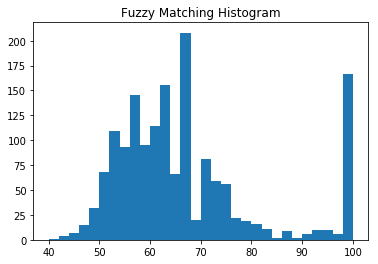

In [38]:
plt.hist([v[1] for k,v in standarize_ingredient_dict_rest.items()], bins=30)
plt.title("Fuzzy Matching Histogram")
plt.show()

In [28]:
def cleaner(row):
    ingredient_list = row["recipe_ingredients"]
    ingredient_list = set([standarize_ingredient_dict[ing] for ing in ingredient_list if ing in standarize_ingredient_dict])
    return ingredient_list

In [29]:
recipe_puppy_api["recipe_ingredients"] = recipe_puppy_api.apply(lambda row: cleaner(row), axis=1)
recipe_puppy_api["num_ingredients"] = recipe_puppy_api.apply(lambda row: len(row["recipe_ingredients"]), axis=1)
recipe_puppy_api = recipe_puppy_api[recipe_puppy_api["num_ingredients"] >= 3]

In [30]:
recipe_puppy_api.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient,num_ingredients
0,5caa762213218a112b0b979f,"{mushroom, egg, shallot}",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg,3
2,5caa762213218a112b0b97a1,"{celery, red currant, cucumber, ginger, egg, l...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg,7
11,5caa762213218a112b0b97aa,"{parsley, egg, ham}",http://www.recipezaar.com/Crepes-Complet-Chees...,"Crepes Complet ( Cheese, Ham, and Egg)",egg,3
12,5caa762213218a112b0b97ab,"{celery, egg, ham}",http://www.recipezaar.com/Egg-and-Ham-Salad-42359,Egg and Ham Salad,egg,3
13,5caa762213218a112b0b97ac,"{egg, celery, basil}",http://www.recipezaar.com/Egg-Salad-Longmeadow...,Egg Salad Longmeadow Farm,egg,3


# Quick Analysis of Recipes

In [31]:
print("number of recipes: ", recipe_puppy_api.shape[0])

number of recipes:  31106


In [32]:
ingredient_list = []
for _, rows in recipe_puppy_api.iterrows():
    for ing in rows["recipe_ingredients"]:
        ingredient_list.append(ing)
print("Number of ingredients in Recipe Puppy API: ", len(ingredient_list))

Number of ingredients in Recipe Puppy API:  128322


In [33]:
print("Number of unique ingredients in Recipe Puppy API: ", len(Counter(ingredient_list)))

Number of unique ingredients in Recipe Puppy API:  188


In [34]:
ingredient_counter = pd.DataFrame.from_dict(Counter(ingredient_list), orient='index').reset_index()
ingredient_counter = ingredient_counter.rename(columns= {"index": "ingredient", 0: "quantity"})
ingredient_counter = ingredient_counter.set_index('ingredient')
ingredient_counter = ingredient_counter.sort_values(by= ["quantity"], ascending= False)
ingredient_counter["rank"] = np.arange(len(ingredient_counter))

In [35]:
ingredient_counter.head(100)

,quantity,rank
ingredient,,
garlic,10445,0
onion,9509,1
egg,6182,2
parsley,4077,3
tomato,3650,4
cinnamon,3644,5
chicken,3121,6
celery,3096,7
carrot,2948,8


In [39]:
ingredient_counter["quantity"].describe()

count      188.000000
mean       682.563830
std       1294.008187
min          1.000000
25%         83.000000
50%        291.500000
75%        663.250000
max      10445.000000
Name: quantity, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

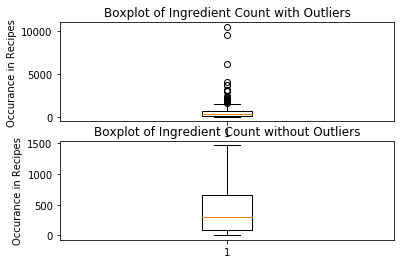

In [40]:
fig, axs = plt.subplots(2)
axs[0].boxplot(ingredient_counter["quantity"])
axs[0].set_title('Boxplot of Ingredient Count with Outliers')
axs[0].set_ylabel("Occurance in Recipes")

axs[1].boxplot(ingredient_counter["quantity"], 0, '')
axs[1].set_title('Boxplot of Ingredient Count without Outliers')
axs[1].set_ylabel("Occurance in Recipes")

plt.show

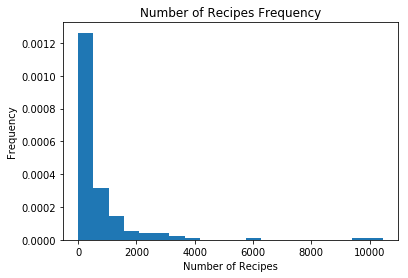

In [66]:
plt.hist(ingredient_counter["quantity"], bins= 20, density=True)
plt.title("Number of Recipes Frequency")
plt.xlabel("Number of Recipes")
plt.ylabel("Frequency")
plt.show()

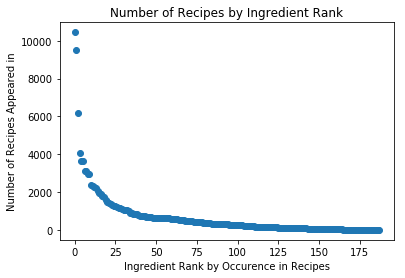

In [54]:
plt.scatter(ingredient_counter["rank"], ingredient_counter["quantity"])
plt.title("Number of Recipes by Ingredient Rank")
plt.xlabel("Ingredient Rank by Occurence in Recipes")
plt.ylabel("Number of Recipes Appeared in")
plt.show()

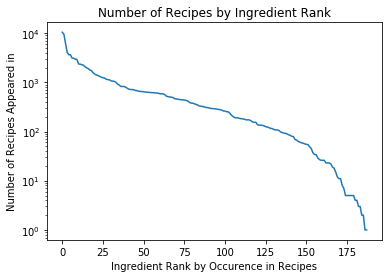

In [55]:
plt.semilogy(ingredient_counter["rank"], ingredient_counter["quantity"])
plt.title("Number of Recipes by Ingredient Rank")
plt.xlabel("Ingredient Rank by Occurence in Recipes")
plt.ylabel("Number of Recipes Appeared in")
plt.show()

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


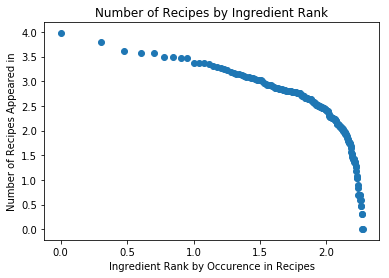

In [52]:
plt.scatter(np.log10(ingredient_counter["rank"]), np.log10(ingredient_counter["quantity"]))
plt.title("Number of Recipes by Ingredient Rank")
plt.xlabel("Ingredient Rank by Occurence in Recipes")
plt.ylabel("Number of Recipes Appeared in")
plt.show()

# Sample Graph

In [120]:
sample_recipes = recipe_puppy_api.sample(n=3, random_state=9)

In [121]:
sample_recipes

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient,num_ingredients
114654,5caa830113218a112b0d577d,"{thyme, celery, carrot, potato, garlic, lamb, ...",http://www.recipezaar.com/Leek-n-Lamb-Stew-mea...,Leek 'n Lamb Stew (meal in One Pot),leek,8
73745,5caa7e6113218a112b0cb7b0,"{onion, chicken, garlic, turmeric, cumin, ging...",http://www.recipezaar.com/Whole-Tandoori-Chick...,Whole Tandoori Chicken,coriander,7
140387,5caa861b13218a112b0dbc02,"{garlic, quinoa, peanut, broccoli}",http://www.recipezaar.com/Curry-Peanut-Red-Qui...,Curry Peanut Red Quinoa,quinoa,4


In [122]:
sample_graph = graph_based_on_shared_recipe_creator(sample_recipes)

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


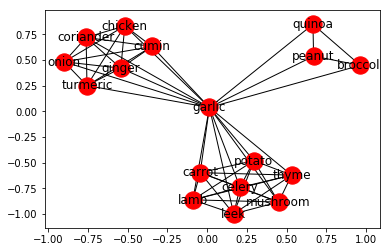

In [129]:
nx.draw_networkx(sample_graph)

# Making a Graph with Entire Recipe Dataset

In [124]:
recipe_graph = graph_based_on_shared_recipe_creator(recipe_puppy_api)

In [126]:
recipe_puppy_api.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient,num_ingredients
0,5caa762213218a112b0b979f,"{mushroom, egg, shallot}",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg,3
2,5caa762213218a112b0b97a1,"{celery, red currant, cucumber, ginger, egg, l...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg,7
11,5caa762213218a112b0b97aa,"{parsley, egg, ham}",http://www.recipezaar.com/Crepes-Complet-Chees...,"Crepes Complet ( Cheese, Ham, and Egg)",egg,3
12,5caa762213218a112b0b97ab,"{celery, egg, ham}",http://www.recipezaar.com/Egg-and-Ham-Salad-42359,Egg and Ham Salad,egg,3
13,5caa762213218a112b0b97ac,"{egg, celery, basil}",http://www.recipezaar.com/Egg-Salad-Longmeadow...,Egg Salad Longmeadow Farm,egg,3


# EDA with Graphs

# Measures of Centrality

In [130]:
recipe_degree_centrality = nx.degree_centrality(recipe_graph)

In [150]:
degree_centrality_pd = pd.DataFrame.from_dict(recipe_degree_centrality, orient='index', columns= ["degree_centrality"])
degree_centrality_pd = degree_centrality_pd.sort_values(by= ["degree_centrality"], ascending= False)
degree_centrality_pd["degree_rank"] = np.arange(len(degree_centrality_pd))
degree_centrality_pd.head()

,degree_centrality,degree_rank
garlic,0.983957,0
onion,0.967914,1
egg,0.925134,2
tomato,0.914439,3
carrot,0.887701,4


In [ ]:
# sorted_recipe_degree_centrality = sorted(recipe_degree_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
# dict_sorted_recipe_degree_centrality = OrderedDict(sorted_recipe_degree_centrality)


In [ ]:
# # degree_centrality_pd = pd.DataFrame.from_dict(dict_sorted_recipe_degree_centrality, orient='index', columns= ["degree_centality"])
# degree_centrality_pd["degree_centrality_rank"] = np.arange(len(degree_centrality_pd))
# degree_centrality_pd.head()

# Betweenness Centrality

In [141]:
recipe_betweenness_centrality = nx.betweenness_centrality(recipe_graph)

In [149]:
betweenness_centrality_pd = pd.DataFrame.from_dict(recipe_betweenness_centrality, orient='index', columns= ["betweenness_centrality"])
betweenness_centrality_pd = betweenness_centrality_pd.sort_values(by= ["betweenness_centrality"], ascending= False)
betweenness_centrality_pd["betweenness_rank"] = np.arange(len(betweenness_centrality_pd))
betweenness_centrality_pd.head()

,betweenness_centrality,betweenness_rank
garlic,0.029546,0
onion,0.025328,1
egg,0.016016,2
tomato,0.013393,3
ginger,0.011729,4


In [ ]:
# sorted_recipe_betweenness_centrality = sorted(recipe_betweenness_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
# dict_sorted_recipe_betweenness_centrality = OrderedDict(sorted_recipe_betweenness_centrality)


In [ ]:
# betweenness_centrality_pd = pd.DataFrame.from_dict(dict_sorted_recipe_betweenness_centrality, orient='index', columns= ["betweenness_centrality"])
# betweenness_centrality_pd["betweenness_centrality_rank"] = np.arange(len(betweenness_centrality_pd))
# betweenness_centrality_pd.head()

# Eigen Vector Centrality

In [143]:
recipe_eigenvector_centrality = nx.eigenvector_centrality(recipe_graph, max_iter=10000)

In [148]:
eigenvector_centrality_pd = pd.DataFrame.from_dict(recipe_eigenvector_centrality, orient='index', columns= ["eigenvector_centrality"])
eigenvector_centrality_pd = eigenvector_centrality_pd.sort_values(by= ["eigenvector_centrality"], ascending= False)
eigenvector_centrality_pd["eigenvector_rank"] = np.arange(len(eigenvector_centrality_pd))
eigenvector_centrality_pd.head()

,eigenvector_centrality,eigenvector_rank
garlic,0.110182,0
onion,0.109888,1
egg,0.108552,2
tomato,0.108374,3
ginger,0.106805,4


In [ ]:
# sorted_eigenvector_centrality = sorted(recipe_eigenvector_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [ ]:
# dict_sorted_eigenvector_centrality = OrderedDict(sorted_eigenvector_centrality)

In [ ]:
# eigenvector_pd = pd.DataFrame.from_dict(dict_sorted_eigenvector_centrality, orient='index', columns= ["eigenvector"])
# eigenvector_pd["eigenvector_rank"] = np.arange(len(eigenvector_pd))
# eigenvector_pd.head()

# Comparing Centralities

In [152]:
combined_graph = pd.merge(degree_centrality_pd, betweenness_centrality_pd, left_index=True, right_index=True)
combined_graph = pd.merge(combined_graph, eigenvector_centrality_pd, left_index=True, right_index=True)

In [172]:
combined_graph.head(15)

,degree_centrality,degree_rank,betweenness_centrality,betweenness_rank,eigenvector_centrality,eigenvector_rank
garlic,0.983957,0,0.029546,0,0.110182,0
onion,0.967914,1,0.025328,1,0.109888,1
egg,0.925134,2,0.016016,2,0.108552,2
tomato,0.914439,3,0.013393,3,0.108374,3
carrot,0.887701,4,0.010503,10,0.106670,6
ginger,0.887701,5,0.011729,4,0.106805,4
celery,0.882353,6,0.010033,12,0.106751,5
rice,0.882353,7,0.010471,11,0.106280,7
parsley,0.877005,8,0.011452,5,0.106015,9
honey,0.877005,9,0.011083,7,0.106059,8


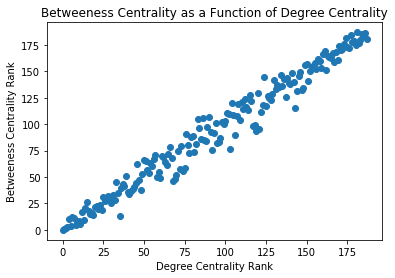

In [170]:
plt.scatter(combined_graph["degree_rank"], combined_graph["betweenness_rank"])
plt.title("Betweeness Centrality as a Function of Degree Centrality")
plt.xlabel("Degree Centrality Rank")
plt.ylabel("Betweeness Centrality Rank")
plt.show()

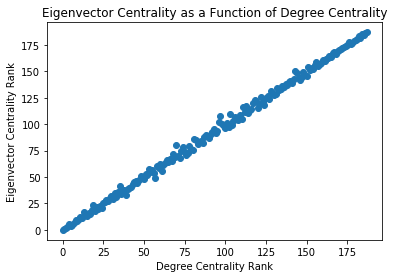

In [171]:
plt.scatter(combined_graph["degree_rank"], combined_graph["eigenvector_rank"])
plt.title("Eigenvector Centrality as a Function of Degree Centrality")
plt.xlabel("Degree Centrality Rank")
plt.ylabel("Eigenvector Centrality Rank")
plt.show()

In [165]:
# plt.scatter(combined_graph["betweenness_rank"], combined_graph["eigenvector_rank"])
# plt.title("Number of Recipes by Ingredient Rank")
# plt.xlabel("Ingredient Rank by Occurence in Recipes")
# plt.ylabel("Number of Recipes Appeared in")
# plt.show()

# Degree Graphs

# Compliments

In [262]:
list_of_edges_quant25 = []
for edge in recipe_graph.edges(data= True):
    ingredient_1 = edge[0]
    ingredient_2 = edge[1]
    quantity_ing1 = recipe_graph.node[ingredient_1]['quantity']
    quantity_ing2 = recipe_graph.node[ingredient_2]['quantity']
    
    if quantity_ing1 >= 25 and quantity_ing2 >= 25:
       list_of_edges_quant25.append(edge)


In [263]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# Compliments based on Edge Weight

In [109]:
edge_weight_compliment = {}
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['weight'], reverse= True):
    edge_weight_compliment[(a,b)] = data["weight"]
#     print('{a} {b} {w}'.format(a=a, b=b, w=data['weight']))

In [110]:
edge_weight_top_compliments = take(15, edge_weight_compliment.items())
edge_weight_top_compliments

[(('egg', 'flour'), 4941),
 (('onion', 'garlic'), 4203),
 (('parsley', 'garlic'), 2283),
 (('celery', 'onion'), 1992),
 (('tomato', 'garlic'), 1968),
 (('onion', 'tomato'), 1847),
 (('flour', 'cinnamon'), 1716),
 (('onion', 'parsley'), 1698),
 (('egg', 'cinnamon'), 1601),
 (('onion', 'carrot'), 1495),
 (('garlic', 'chicken'), 1356),
 (('garlic', 'thyme'), 1309),
 (('egg', 'onion'), 1308),
 (('basil', 'garlic'), 1270),
 (('onion', 'flour'), 1246)]

# Compliments based on IOU

In [148]:
iou_compliment = {}
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['iou'], reverse= True):
    iou_compliment[(a,b)] = data["iou"]

#     print('{a} {b} {w}'.format(a=a, b=b, w=data['iou']))

In [149]:
iou_top_compliments = take(15, iou_compliment.items())
iou_top_compliments

[(('egg', 'flour'), 0.25076126674786847),
 (('onion', 'garlic'), 0.17243784360384015),
 (('celery', 'carrot'), 0.14704607828975877),
 (('nutmeg', 'cinnamon'), 0.14647194910352804),
 (('celery', 'onion'), 0.13434949753827477),
 (('cumin', 'coriander'), 0.1312),
 (('parsley', 'garlic'), 0.12424489795918367),
 (('flour', 'cinnamon'), 0.11929092805005213),
 (('onion', 'tomato'), 0.11919974185221038),
 (('tomato', 'garlic'), 0.11261802575107296),
 (('coriander', 'turmeric'), 0.11242022582228768),
 (('egg', 'cinnamon'), 0.1097251730518813),
 (('cinnamon', 'apple'), 0.10745073891625616),
 (('onion', 'parsley'), 0.10356816102470265),
 (('onion', 'carrot'), 0.10317460317460317)]

# Compliments based on PMI


In [264]:
pmi_compliment = {}
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['pmi'], reverse= True):
    if recipe_graph[a][b]["weight"] > 10:
        pmi_compliment[(a,b)] = data["pmi"]
    
    #     print('{a} {b} {w}'.format(a=a, b=b, w=data['pmi']))


In [265]:
pmi_top_compliments = take(10, pmi_compliment.items())
pmi_top_compliments

[(('turmeric', 'fenugreek'), 1.3969152351622707),
 (('wasabi', 'yellowfin tuna'), 1.30291790924321),
 (('horseradish', 'beetroot'), 1.2353870074276017),
 (('raisin', 'oats'), 1.087379302889722),
 (('banana', 'oats'), 1.0698885707293866),
 (('salmon', 'caviar'), 1.0606085662571942),
 (('cardamom', 'basmati rice'), 1.0368987984247182),
 (('turnip', 'parsnip'), 1.0333181485155079),
 (('avocado', 'grapefruit'), 1.0057022639427655),
 (('coriander', 'fenugreek'), 0.979974872977048)]

# Substitutes

In [55]:
def bhattacharyya_quotient(ingredient_1 = "egg", x = "flour"):
    
    if recipe_graph.get_edge_data(ingredient_1, x) == None:
        ing_1_quotient = 0
    
    else:
        ing_1_numerator = recipe_graph.get_edge_data(ingredient_1, x)["weight"]
        ing_1_denominator = sum([data["weight"] for _, __, data in recipe_graph.edges(ingredient_1, data = True)])
        ing_1_quotient = ing_1_numerator / ing_1_denominator 
    
    return ing_1_quotient

In [56]:
def bhattacharyya_distance(ingredient_1 = "pecans", ingredient_2 = "walnut", graph= recipe_graph):
    result = 0 
    for iter_ing in graph.nodes():
        quot_1 = bhattacharyya_quotient(ingredient_1, iter_ing)
        quot_2 = bhattacharyya_quotient(ingredient_2, iter_ing)
        result += (quot_1 * quot_2) ** 0.5
    
    if result == 0:
        return 1
    return -1 * np.log10(result)

In [57]:
bhattacharyya_distance()

0.012985286756912908

# Bhattacharyya Distance on every possible combination

In [65]:
dict_bhattacharry_distance = {}
for combo in combinations(recipe_graph.nodes(), 2):
#     if recipe_graph.nodes[combo[0]]['quantity'] < 2000 or recipe_graph.nodes[combo[1]]['quantity'] < 2000:
#         continue
    bd = bhattacharyya_distance(combo[0], combo[1])
    dict_bhattacharry_distance[combo] = bd


KeyboardInterrupt: 

In [ ]:
sorted_bhattacharry_distance = sorted(dict_bhattacharry_distance.items(), key=lambda kv: kv[1])
sorted_dict_bhattacharry_distance = OrderedDict(sorted_bhattacharry_distance)
bhattacharyya_top_substitues = take(50, sorted_dict_bhattacharry_distance.items())
bhattacharyya_top_substitues

# Interpretation Based on Molecules

In [ ]:
flavorDB["category"].unique()

In [ ]:
flavorDB["category"].value_counts()

In [ ]:
flavorDB.head()

In [ ]:
within_category_ratio_dict = {}
for category in flavorDB["category"].unique():
    print(category)
    category_ratio = np.array([])
    category_flavorDB = flavorDB[flavorDB["category"] == category]
    if len(category_flavorDB) < 5:
        continue
    category_ing_list = category_flavorDB["ingredient"].tolist()
    for combo in combinations(category_ing_list, 2):
        ratio, _, __, ___ = common_pair_analysis(combo[0], combo[1])
        category_ratio = np.append(category_ratio, ratio)
    avg_category_ratio = np.mean(category_ratio)
    within_category_ratio_dict[category] = avg_category_ratio   

In [ ]:
within_category_ratio_dict

In [ ]:
with open('./data/within_category_ratio_arr', 'wb') as file:
    file.write(pickle.dumps(within_category_ratio_arr))
    file.close()

In [ ]:
within_category_ratio_arr = np.array(list(within_category_ratio_dict.values()))

In [ ]:
within_category_ratio_arr

{'Beverage Caffeinated': 0.023188029601838158,
 'Cereal': 0.47193357224355886,
 'Maize': 0.08685947094578159,
 'Dairy': 0.2705332213408974,
 'Berry': 0.6709720505399656,
 'Seafood': 0.1805610937894723,
 'Fish': 0.4755572893609933,
 'Fruit': 0.3623062597191793,
 'Fruit Citrus': 0.22556767676992678,
 'Fungus': 0.5675762075179079,
 'Herb': 0.5729498524273214,
 'Meat': 0.36729174033525025,
 'Nut': 0.6560600269937148,
 'Plant Derivative': 0.07119239491088235,
 'Spice': 0.33893145620402493,
 'Vegetable': 0.5669787790025552,
 'Cabbage': 0.7815459100999627,
 'Vegetable Root': 0.7054557583136626,
 'Gourd': 0.8039874482326979,
 'Vegetable Tuber': 0.6727014995708049}

# Molecule Ratio of Top Bhattacharyya Distances

In [ ]:
ratio_bhattacharyya_arr = np.array([])
for pair in bhattacharyya_top_substitues:
    ing1 = pair[0][0]
    ing2 = pair[0][1]
    ratio, _, __, ___ = common_pair_analysis(ing1, ing2)
    ratio_bhattacharyya_arr = np.append(ratio_bhattacharyya_arr, ratio)
    print(ratio, ing1, ing2)


In [ ]:
ratio_bhattacharyya_arr

Combinging the Two

In [ ]:
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')


In [ ]:
from scipy import stats

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(within_category_ratio_arr, 50, density=True, histtype='step',cumulative=True, label='Empirical')
ax.hist(ratio_bhattacharyya_arr, 50, density=True, histtype='step',cumulative=True, label='Empirical')
plt.show()


In [ ]:
stats.ks_2samp(ratio_bhattacharyya_arr, within_category_ratio_arr)

# All of Bhattacharyya Distances

[(('walnut', 'pecans'), 0.015992631027561786),
 (('milk', 'skimmed milk'), 0.01969130052850979),
 (('cheese', 'cheddar cheese'), 0.020758856383458413),
 (('white pepper', 'chive'), 0.022141242304505232),
 (('walnut', 'almond'), 0.025280848456086302),
 (('parmesan cheese', 'romano cheese'), 0.02654215229680028),
 (('white pepper', 'parsley'), 0.026740686950173915),
 (('white pepper', 'potato'), 0.02743646945584778),
 (('milk', 'evaporated milk'), 0.02788176595653082),
 (('white pepper', 'leek'), 0.02823937284073544),
 (('shallot', 'lemon'), 0.028336436142838588),
 (('chicken', 'turkey'), 0.028716291184999895),
 (('cheese', 'swiss cheese'), 0.028874325568267512),
 (('parsley', 'thyme'), 0.028994108654302433),
 (('winter squash', 'butternut squash'), 0.029137430905819255),
 (('shallot', 'chive'), 0.029637308496894013),
 (('white pepper', 'thyme'), 0.029751848864108747),
 (('mushroom', 'thyme'), 0.029791831961968565),
 (('mushroom', 'parsley'), 0.030373500165506127),
 (('clove', 'allspice'), 0.03042292262524438),
 (('white pepper', 'mushroom'), 0.030581148713462042),
 (('pecans', 'almond'), 0.03061444424266615),
 (('white pepper', 'tarragon'), 0.03092448013271665),
 (('cheese', 'parmesan cheese'), 0.03097950054800081),
 (('sweet potato', 'yam'), 0.031083459937286693),
 (('chicken', 'shrimp'), 0.03163944828548799),
 (('plum', 'apricot'), 0.03191610601043731),
 (('thyme', 'rosemary'), 0.03192963348900025),
 (('rosemary', 'marjoram'), 0.032015391231895396),
 (('honey', 'orange'), 0.03242587283732452),
 (('tomato', 'cherry tomato'), 0.03251036216192002),
 (('milk', 'buttermilk'), 0.032581199941510715),
 (('mushroom', 'celery'), 0.03260822322134255),
 (('thyme', 'marjoram'), 0.03267972185722435),
 (('blackberry', 'raspberry'), 0.03268375657039242),
 (('mushroom', 'marjoram'), 0.03276794109350866),
 (('white pepper', 'shallot'), 0.03281002486134788),
 (('parsley', 'spinach'), 0.03283424944542265),
 (('sage', 'marjoram'), 0.03288480236668147),
 (('cheddar cheese', 'swiss cheese'), 0.032936839941316534),
 (('white pepper', 'pepper'), 0.03295336297563834),
 (('chive', 'asparagus'), 0.03325625315298724),
 (('potato', 'thyme'), 0.033400773432801956),
 (('blue cheese', 'roquefort cheese'), 0.033459643372212744),
 (('mushroom', 'potato'), 0.03349218963433239),
 (('sweet potato', 'butternut squash'), 0.03350297008384161),
 (('plum', 'prickly pear'), 0.03378351962440435),
 (('parsley', 'rosemary'), 0.03378645124424151),
 (('chive', 'parsley'), 0.03383918843398103),
 (('fish', 'lobster'), 0.033897448999353576),
 (('thyme', 'sage'), 0.03400490686563681),
 (('nuts', 'pecans'), 0.03413923134160778),
 (('shallot', 'onion'), 0.03418304412425414),
 (('bartlett pear', 'prickly pear'), 0.03442343692769297),
 (('tarragon', 'thyme'), 0.03473301688667244),
 (('white pepper', 'carrot'), 0.034771981589772696),
 (('chive', 'leek'), 0.03497325857174126),
 (('chive', 'thyme'), 0.035257795536759964),
 (('peach', 'apricot'), 0.035324863062122944),
 (('tarragon', 'fennel'), 0.03537662711802633),
 (('white pepper', 'lemon'), 0.03541562538786783),
 (('basil', 'spinach'), 0.03556194369500145),
 (('parsley', 'marjoram'), 0.035741058390228266),
 (('basil', 'parsley'), 0.03578441613970702),
 (('parsley', 'potato'), 0.03579106315258766),
 (('thyme', 'leek'), 0.03584879821535855),
 (('white pepper', 'cream'), 0.03590153176071061),
 (('white pepper', 'cheese'), 0.03590273051564559),
 (('romano cheese', 'provolone cheese'), 0.0360192006809886),
 (('broccoli', 'spinach'), 0.036096416303985725),
 (('parsnip', 'leek'), 0.03614332173152845),
 (('chive', 'tarragon'), 0.03623835020940512),
 (('parsley', 'leek'), 0.03632654975048029),
 (('basil', 'oregano'), 0.03633453501431125),
 (('currant', 'raisin'), 0.03647031483899562),
 (('shallot', 'parsley'), 0.03648596893049667),
 (('potato', 'leek'), 0.036496273753929574),
 (('spinach', 'asparagus'), 0.03657478175796906),
 (('celery', 'thyme'), 0.03658782392409654),
 (('white pepper', 'asparagus'), 0.03661312805879911),
 (('chicken', 'pork'), 0.03670233327672222),
 (('shallot', 'leek'), 0.03678736441401048),
 (('mushroom', 'carrot'), 0.03686294062840946),
 (('tarragon', 'leek'), 0.03696652586156405),
 (('parsley', 'asparagus'), 0.037042540217930436),
 (('parsley', 'pepper'), 0.03723457036932611),
 (('mozzarella cheese', 'provolone cheese'), 0.0374977488695388),
 (('chive', 'spinach'), 0.03767345345352922),
 (('oregano', 'cherry tomato'), 0.03767585812174505),
 (('carrot', 'thyme'), 0.0377847459793727),
 (('sage', 'rosemary'), 0.03788983976319628),
 (('lemon', 'chive'), 0.03815475916974138),
 (('tarragon', 'rosemary'), 0.03827653898508433),
 (('parsley', 'tomato'), 0.0383236953768516),
 (('white pepper', 'sage'), 0.03832867616246678),
 (('leek', 'rosemary'), 0.0383717754737211),
 (('white pepper', 'chicken'), 0.03837313113620204),
 (('sweet potato', 'winter squash'), 0.03846176011168271),
 (('tomato', 'oregano'), 0.03851897587929799),
 (('mushroom', 'broccoli'), 0.038585351767203936),
 (('beef', 'turkey'), 0.038695559748002935),
 (('white pepper', 'spinach'), 0.03871671541116329),
 (('fish', 'shrimp'), 0.03872771952098796),
 (('nutmeg', 'pecans'), 0.038789597515901005),
 (('fish', 'squid'), 0.03883531160311627),
 (('walnut', 'nutmeg'), 0.038838679866724395),
 (('shallot', 'fennel'), 0.03893023347431445),
 (('white pepper', 'celery'), 0.03896500563977031),
 (('parsley', 'green beans'), 0.03904175031053488),
 (('shallot', 'thyme'), 0.039193824722166704),
 (('bulgur', 'quinoa'), 0.039273905388107745),
 (('orange', 'yogurt'), 0.039294663159715235),
 (('lobster', 'haddock'), 0.039335561719204735),
 (('pecans', 'apple'), 0.03944915132504325),
 (('milk', 'cream'), 0.03948876212581419),
 (('coriander', 'turmeric'), 0.03958552252809674),
 (('mozzarella cheese', 'romano cheese'), 0.039653345740549226),
 (('white pepper', 'onion'), 0.03969772595475256),
 (('salmon', 'atlantic salmon'), 0.03971962603331425),
 (('parsley', 'tarragon'), 0.03976256220546426),
 (('mushroom', 'asparagus'), 0.03979057254119462),
 (('pepper', 'cherry tomato'), 0.03979149981890923),
 (('mango', 'papaya'), 0.03984120712798399),
 (('shallot', 'rosemary'), 0.03988236922236324),
 (('evaporated milk', 'skimmed milk'), 0.039926359967166654),
 (('apricot', 'prickly pear'), 0.03993807970514704),
 (('raisin', 'dates'), 0.03993997522131402),
 (('mushroom', 'pepper'), 0.039946479425194685),
 (('chicken', 'beef'), 0.04009938584296138),
 (('chive', 'potato'), 0.04013852841783802),
 (('mushroom', 'sage'), 0.04016930331982235),
 (('rabbit', 'pheasant'), 0.04017793968471474),
 (('celery', 'parsley'), 0.04019442733414342),
 (('leek', 'marjoram'), 0.04035991147355691),
 (('mandarin orange', 'apricot'), 0.04037925309592704),
 (('mushroom', 'oyster mushroom'), 0.040440788352374),
 (('cheese', 'chive'), 0.040447621958108304),
 (('shallot', 'tarragon'), 0.04046359910940429),
 (('mushroom', 'basil'), 0.040476332065829006),
 (('white pepper', 'fennel'), 0.04051627628069528),
 (('lemon', 'pepper'), 0.0406548213494479),
 (('shallot', 'asparagus'), 0.040664928014476284),
 (('tomato', 'pepper'), 0.04068757180772259),
 (('white pepper', 'rosemary'), 0.04069422673622769),
 (('cheese', 'mustard'), 0.04079404576018203),
 (('parsley', 'carrot'), 0.040904194918535995),
 (('apple', 'allspice'), 0.04099538041207114),
 (('mushroom', 'leek'), 0.041019730940153966),
 (('tarragon', 'asparagus'), 0.041042572475887766),
 (('pepper', 'thyme'), 0.041117826318439125),
 (('walnut', 'nuts'), 0.041130894625966676),
 (('white pepper', 'mustard'), 0.0411512627542403),
 (('thyme', 'green beans'), 0.04117281242293932),
 (('mushroom', 'tarragon'), 0.0412493403613208),
 (('mushroom', 'rosemary'), 0.04137614957713647),
 (('mushroom', 'chive'), 0.04144370646619236),
 (('lemon', 'rice'), 0.04145242173228602),
 (('oregano', 'pepper'), 0.0414876419725677),
 (('white pepper', 'shrimp'), 0.041490687430805875),
 (('buttermilk', 'skimmed milk'), 0.04150681393289487),
 (('swiss cheese', 'gruyere cheese'), 0.04152307774893712),
 (('onion', 'parsley'), 0.04152954111159216),
 (('sage', 'leek'), 0.041625322477239914),
 (('raisin', 'allspice'), 0.04163055421872852),
 (('apple', 'raisin'), 0.041637820909739456),
 (('raisin', 'apricot'), 0.04164201439734417),
 (('parsley', 'oregano'), 0.041659018741676476),
 (('nutmeg', 'apple'), 0.041673566422291475),
 (('walnut', 'apple'), 0.04167972990632462),
 (('honey', 'yogurt'), 0.041756308988272435),
 (('parsley', 'chicken'), 0.041775491517573364),
 (('chicken', 'pepper'), 0.041918330263774006),
 (('raisin', 'plum'), 0.04199555202925451),
 (('raspberry', 'strawberry'), 0.042098670281091474),
 (('cream cheese', 'cottage cheese'), 0.042202513982612724),
 (('honey', 'almond'), 0.04222168168856651),
 (('rice', 'yogurt'), 0.04228859178781141),
 (('spinach', 'pepper'), 0.0423440367141966),
 (('almond', 'raisin'), 0.04243422092543581),
 (('lemon', 'parsley'), 0.04243735583319378),
 (('shrimp', 'pepper'), 0.04245988980299089),
 (('oregano', 'eggplant'), 0.0424630454939256),
 (('mushroom', 'green beans'), 0.042563021992754045),
 (('mushroom', 'tomato'), 0.04261101583776059),
 (('dates', 'apricot'), 0.04266919922460945),
 (('pecans', 'raisin'), 0.0426712875952765),
 (('mint', 'yogurt'), 0.04268265456335722),
 (('squid', 'monkfish'), 0.04268510544228308),
 (('apple', 'sweet potato'), 0.04270269920286144),
 (('chicken', 'carrot'), 0.042728502255499734),
 (('lemon', 'fennel'), 0.042790741743521064),
 (('carrot', 'pork'), 0.0428335173005841),
 (('nutmeg', 'raisin'), 0.04284271980674664),
 (('lemon', 'thyme'), 0.04300844867374516),
 (('peach', 'plum'), 0.043022588649319946),
 (('pepper', 'rosemary'), 0.043054255609388976),
 (('allspice', 'sweet potato'), 0.04308421761726594),
 (('cheese', 'cottage cheese'), 0.04309443791783608),
 (('basil', 'pepper'), 0.043108478873572435),
 (('mustard', 'potato'), 0.04313829451438538),
 (('kale', 'thyme'), 0.04313855791818169),
 (('potato', 'sage'), 0.04314565838122621),
 (('vinegar', 'carrot'), 0.0431596801927332),
 (('lemon', 'tarragon'), 0.04319689812402595),
 (('chive', 'pepper'), 0.04321766445224145),
 (('potato', 'pepper'), 0.04326101069808967),
 (('peach', 'prickly pear'), 0.043263978354561264),
 (('potato', 'marjoram'), 0.04329647340752291),
 (('apple', 'clove'), 0.04333654659640849),
 (('chicken', 'green beans'), 0.043390968798891004),
 (('chervil', 'fennel'), 0.04342489065457709),
 (('walnut', 'hazelnut'), 0.04351757958193494),
 (('pepper', 'green beans'), 0.043626790535608834),
 (('honey', 'apple'), 0.04368414755614115),
 (('apple', 'almond'), 0.04371476351532007),
 (('nutmeg', 'sweet potato'), 0.04373690856246772),
 (('cream', 'almond'), 0.04376979635580359),
 (('chive', 'cream'), 0.04383706494844081),
 (('fish', 'monkfish'), 0.043853870538552504),
 (('onion', 'leek'), 0.04386962879861383),
 (('asparagus', 'green beans'), 0.04388126844017345),
 (('white pepper', 'lobster'), 0.043896942561584176),
 (('cumin', 'coriander'), 0.04393327978376686),
 (('turnip', 'parsnip'), 0.0440832596446764),
 (('ginger', 'clove'), 0.04411526249752091),
 (('white pepper', 'parmesan cheese'), 0.04413526066745514),
 (('ham', 'turkey'), 0.04417795998195534),
 (('carrot', 'sage'), 0.044191999454110696),
 (('pork', 'turkey'), 0.04419881513339144),
 (('vinegar', 'yogurt'), 0.044265094709584764),
 (('coconut', 'apricot'), 0.04428467624016179),
 (('white pepper', 'marjoram'), 0.04441745756971784),
 (('white pepper', 'tomato'), 0.04443216008394792),
 (('onion', 'thyme'), 0.04447100036559472),
 (('cheese', 'spinach'), 0.04451041611398945),
 (('milk', 'nutmeg'), 0.04456290623479201),
 (('thyme', 'fennel'), 0.04462419853423194),
 (('cocoa powder', 'chocolate'), 0.0446261659993597),
 (('nutmeg', 'almond'), 0.04465316937761302),
 (('tarragon', 'chervil'), 0.0447138914364187),
 (('mushroom', 'chicken'), 0.04472766953882734),
 (('kale', 'parsnip'), 0.044774703795282485),
 (('parsley', 'sage'), 0.0447934420694616),
 (('oregano', 'marjoram'), 0.04481371765163155),
 (('potato', 'carrot'), 0.04482502721753879),
 (('raisin', 'clove'), 0.04492106391542502),
 (('clove', 'sweet potato'), 0.044991852405874104),
 (('celery', 'green beans'), 0.04501146885430622),
 (('mushroom', 'oregano'), 0.045018672871302304),
 (('lemon', 'carrot'), 0.04511442227682895),
 (('lemon', 'vinegar'), 0.045121202795320406),
 (('milk', 'almond'), 0.045192479982899936),
 (('apricot', 'cherry'), 0.045195416846230865),
 (('chive', 'chicken'), 0.04519912571599833),
 (('orange', 'almond'), 0.045264145306882234),
 (('mushroom', 'parmesan cheese'), 0.045305197171589214),
 (('cheese', 'gruyere cheese'), 0.04535530653436283),
 (('chive', 'mustard'), 0.04546121195234323),
 (('rosemary', 'green beans'), 0.045468983386369274),
 (('pork', 'beef'), 0.045471263518228784),
 (('flour', 'cream'), 0.04550064398299173),
 (('parsley', 'broccoli'), 0.045505230846117614),
 (('milk', 'cream cheese'), 0.045528570398069845),
 (('nutmeg', 'evaporated milk'), 0.0455614769068368),
 (('mushroom', 'spinach'), 0.045586095162153326),
 (('spinach', 'oregano'), 0.04559263718033428),
 (('cheese', 'parsley'), 0.04559596110735646),
 (('leek', 'fennel'), 0.04561360072677074),
 (('chicken', 'spinach'), 0.045697029511147534),
 (('gruyere cheese', 'oyster mushroom'), 0.045708868001933384),
 (('basil', 'eggplant'), 0.04574514855571609),
 (('basil', 'thyme'), 0.045830038732808),
 (('beef', 'kale'), 0.04584470116366522),
 (('lemon', 'yogurt'), 0.04585266965098683),
 (('cheese', 'romano cheese'), 0.04585416103382576),
 (('tarragon', 'pepper'), 0.04586064858237852),
 (('celery', 'carrot'), 0.04586209907990407),
 (('potato', 'tarragon'), 0.045866411997843866),
 (('white pepper', 'fish'), 0.04591685186477151),
 (('onion', 'chive'), 0.04594405650487991),
 (('mint', 'lime'), 0.045947937553898296),
 (('chive', 'parmesan cheese'), 0.04595305058071137),
 (('flour', 'nutmeg'), 0.04595515366578116),
 (('celery', 'potato'), 0.04595692184169332),
 (('jalapeno', 'pepper'), 0.04597168161519101),
 (('shallot', 'chicken'), 0.046003221366901145),
 (('ginger', 'rice'), 0.04600999598923033),
 (('apple', 'plum'), 0.04604903582372533),
 (('saffron', 'fennel'), 0.04612510979165268),
 (('celery', 'cabbage'), 0.04612931975944423),
 (('chicken', 'thyme'), 0.0461886701749217),
 (('shrimp', 'lobster'), 0.046307864301821766),
 (('white pepper', 'green beans'), 0.04639149516056965),
 (('thyme', 'asparagus'), 0.0463952006583009),
 (('chive', 'fennel'), 0.0464035352472351),
 (('sage', 'parsnip'), 0.046468212253410246),
 (('plum', 'dates'), 0.04648010331450137),
 (('walnut', 'milk'), 0.0464823022489919),
 (('cherry tomato', 'capers'), 0.046491947059561584),
 (('walnut', 'cream'), 0.04650209508065417),
 (('fennel', 'monkfish'), 0.046505079353961386),
 (('cocoa powder', 'vanilla'), 0.0465295034481673),
 (('pork', 'butternut squash'), 0.04654021205768199),
 (('rice', 'vinegar'), 0.04657062013012714),
 (('carrot', 'pepper'), 0.04661145112167958),
 (('chive', 'chervil'), 0.04661861513694172),
 (('cinnamon', 'raisin'), 0.046637416768879225),
 (('nutmeg', 'cream'), 0.04664559685380409),
 (('shallot', 'pepper'), 0.046655251832781616),
 (('broccoli', 'asparagus'), 0.046668654950569516),
 (('walnut', 'raisin'), 0.046785411848811916),
 (('honey', 'clove'), 0.04680689194020319),
 (('evaporated milk', 'cream'), 0.04682184109788663),
 (('shallot', 'chervil'), 0.04686114984081547),
 (('cream cheese', 'cream'), 0.04688535834795844),
 (('celery', 'beef'), 0.04688598479507269),
 (('spinach', 'thyme'), 0.04690404247093103),
 (('apple', 'currant'), 0.04691564494245736),
 (('milk', 'pecans'), 0.04692518109248262),
 (('cottage cheese', 'ricotta cheese'), 0.04693789328359527),
 (('feta cheese', 'goat cheese'), 0.046954613973462324),
 (('rosemary', 'fennel'), 0.04698985067668571),
 (('white pepper', 'corn'), 0.04704773800093421),
 (('yellow zucchini', 'meat'), 0.047050122073840094),
 (('lemon', 'tomato'), 0.04705473877989262),
 (('ginger', 'yogurt'), 0.04707060738105584),
 (('oats', 'apple sauce'), 0.047076915850243976),
 (('yogurt', 'lime'), 0.04709237389489758),
 (('parsnip', 'butternut squash'), 0.04711748328823369),
 (('white pepper', 'oyster'), 0.04715409513739247),
 (('shallot', 'potato'), 0.047154646677381604),
 (('tomato', 'chicken'), 0.04716462597891295),
 (('rice', 'chicken'), 0.04717029323340874),
 (('parsley', 'fennel'), 0.04718428126610257),
 (('carrot', 'marjoram'), 0.04719115937970433),
 (('celery', 'rosemary'), 0.047215634786058315),
 (('oyster', 'lobster'), 0.047238450406422),
 (('quail', 'pheasant'), 0.047255816312438796),
 (('pear', 'apple'), 0.047264580862239905),
 (('oregano', 'rosemary'), 0.047276963606780104),
 (('crab', 'lobster'), 0.04731838259464838),
 (('walnut', 'honey'), 0.04732317046689006),
 (('mint', 'orange'), 0.04733534319562308),
 (('parmesan cheese', 'thyme'), 0.04734714646510941),
 (('lemon', 'cream'), 0.04735442466256768),
 (('chive', 'shrimp'), 0.047361697791480965),
 (('white pepper', 'broccoli'), 0.04736768239329179),
 (('ginger', 'orange'), 0.047403639741552366),
 (('lobster', 'atlantic salmon'), 0.04743261443759166),
 (('carrot', 'leek'), 0.04743521702874417),
 (('rice', 'carrot'), 0.04745811303443628),
 (('mushroom', 'shallot'), 0.04747942417298305),
 (('mustard', 'carrot'), 0.047488715153093504),
 (('onion', 'chicken'), 0.04749084013045039),
 (('cheese', 'ham'), 0.04749296014089953),
 (('cheese', 'potato'), 0.047518180987816856),
 (('basmati rice', 'red rice'), 0.04758646374503451),
 (('lime', 'mango'), 0.04762521294842529),
 (('cheese', 'cream'), 0.047695389533154955),
 (('cocoa powder', 'oats'), 0.04770322716657625),
 (('carrot', 'cabbage'), 0.04770524203788174),
 (('lemon', 'basil'), 0.04770763578014856),
 (('leek', 'chervil'), 0.047718656823012524),
 (('lemon', 'onion'), 0.047804526145591573),
 (('fish', 'fennel'), 0.04780642575255588),
 (('kale', 'sage'), 0.04781562488343513),
 (('plum', 'star anise'), 0.047831641408750514),
 (('tomato', 'thyme'), 0.04789608424601586),
 (('pork', 'kale'), 0.0479211438999235),
 (('potato', 'parsnip'), 0.047961277970857565),
 (('lemon', 'shrimp'), 0.04796452378433747),
 (('kale', 'butternut squash'), 0.04803505291557058),
 (('cheese', 'pepper'), 0.048048531831538434),
 (('asparagus', 'leek'), 0.048053590138524976),
 (('butter', 'cream'), 0.04806241177316729),
 (('egg', 'milk'), 0.04808584273260107),
 (('potato', 'cauliflower'), 0.04815795801290732),
 (('oregano', 'thyme'), 0.048162395023225085),
 (('walnut', 'buttermilk'), 0.04818787874695611),
 (('currant', 'almond'), 0.0482797156498689),
 (('kale', 'green beans'), 0.04828534733900743),
 (('shallot', 'carrot'), 0.04828890791895851),
 (('leek', 'lobster'), 0.048324709472030956),
 (('banana', 'coconut'), 0.0483706538341578),
 (('chive', 'rosemary'), 0.04841027409501039),
 (('tomato', 'shrimp'), 0.048465688150279754),
 (('parsley', 'parmesan cheese'), 0.04847347145468783),
 (('nutmeg', 'allspice'), 0.04848317978693721),
 (('celery', 'marjoram'), 0.04850040064442448),
 (('honey', 'raisin'), 0.04850945158711626),
 (('orange', 'pear'), 0.04852196059609947),
 (('tarragon', 'lobster'), 0.04852507938913871),
 (('ginger', 'honey'), 0.04853651702541038),
 (('romano cheese', 'oyster mushroom'), 0.048547317271529035),
 (('pork', 'pepper'), 0.048557798662764586),
 (('kale', 'leek'), 0.04856664161591518),
 (('tarragon', 'marjoram'), 0.048614297133011394),
 (('gruyere cheese', 'romano cheese'), 0.048644343496061025),
 (('currant', 'plum'), 0.048682359904674156),
 (('cream cheese', 'evaporated milk'), 0.048698372702283305),
 (('sweet potato', 'plum'), 0.04871077254016755),
 (('pepper', 'fennel'), 0.04875095222206008),
 (('clam', 'lobster'), 0.048798254123807366),
 (('white pepper', 'cauliflower'), 0.048799500745755314),
 (('dates', 'oats'), 0.04880461282503457),
 (('basil', 'rosemary'), 0.04882446981900329),
 (('almond', 'hazelnut'), 0.04882948512004213),
 (('flour', 'evaporated milk'), 0.048829944731194744),
 (('vinegar', 'cabbage'), 0.04883208163041851),
 (('mushroom', 'cheese'), 0.04891395092455951),
 (('currant', 'allspice'), 0.04891568373518262),
 (('orange', 'apple'), 0.04901855714855069),
 (('egg', 'nutmeg'), 0.049025673758011465),
 (('mushroom', 'onion'), 0.04904830676235432),
 (('parsley', 'corn'), 0.04905168926012027),
 (('turkey', 'yellowfin tuna'), 0.04908954420812508),
 (('parsley', 'kale'), 0.04909421486797699),
 (('carrot', 'kale'), 0.04911046008729403),
 (('walnut', 'skimmed milk'), 0.049110951012784974),
 (('kale', 'rosemary'), 0.04915102388529115),
 (('parsley', 'shrimp'), 0.04916869605109571),
 (('carrot', 'rosemary'), 0.049203291860831166),
 (('celery', 'sage'), 0.049209318860430076),
 (('mushroom', 'turkey'), 0.04920974994328092),
 (('chicken', 'cauliflower'), 0.049225850517484064),
 (('apple', 'apricot'), 0.04922621716682719),
 (('onion', 'carrot'), 0.04923377923009856),
 (('pepper', 'leek'), 0.04923697694664445),
 (('green beans', 'marjoram'), 0.04924892943202415),
 (('mustard', 'pepper'), 0.049277825382994404),
 (('chive', 'salmon'), 0.04934557127453631),
 (('cheddar cheese', 'parmesan cheese'), 0.049351493336954176),
 (('nuts', 'oats'), 0.049362306419948834),
 (('white pepper', 'basil'), 0.049435930661889636),
 (('shallot', 'shrimp'), 0.049464112012095315),
 (('fennel', 'lobster'), 0.04948943026318298),
 (('cherry tomato', 'feta cheese'), 0.049516700574999295),
 (('potato', 'asparagus'), 0.049567341642662924),
 (('rhubarb', 'blackberry'), 0.04959608337663042),
 (('jalapeno', 'corn'), 0.04959970067822642),
 (('lemon', 'lime'), 0.049686429677697784),
 (('pepper', 'asparagus'), 0.04971314362608263),
 (('cream', 'sweet potato'), 0.04971936834813289),
 (('rice', 'cream'), 0.04975046093474611),
 (('asparagus', 'fennel'), 0.049753058796823645),
 (('chicken', 'asparagus'), 0.04975310350761819),
 (('blue cheese', 'goat cheese'), 0.0497653065401282),
 (('mustard', 'vinegar'), 0.04977489545042968),
 (('parsley', 'mustard'), 0.049841448696923044),
 (('basil', 'feta cheese'), 0.04986058767257977),
 (('white pepper', 'kale'), 0.04987907272270093),
 (('evaporated milk', 'buttermilk'), 0.04990650346202051),
 (('celery', 'leek'), 0.04990981690763718),
 (('yogurt', 'almond'), 0.04991942583074827),
 (('cheddar cheese', 'ham'), 0.04992645544129716),
 (('ricotta cheese', 'romano cheese'), 0.04994502167832362),
 (('evaporated milk', 'pecans'), 0.04994857503439742),
 (('salmon', 'lobster'), 0.04995157920178125),
 (('mushroom', 'lemon'), 0.049966240474426264),
 (('coriander', 'saffron'), 0.04996683233902014),
 (('yellowfin tuna', 'albacore tuna'), 0.04997936261219775),
 (('white pepper', 'ham'), 0.050003473095243826),
 (('potato', 'cream'), 0.05000889631884136),
 (('kale', 'pepper'), 0.050034994418286634),
 (('parmesan cheese', 'spinach'), 0.05004132556292061),
 (('ricotta cheese', 'yellow zucchini'), 0.05009467835772376),
 (('strawberry jam', 'blackberry'), 0.0500952531690088),
 (('celery', 'tarragon'), 0.050106704185260094),
 (('mustard', 'horseradish'), 0.05011618380489275),
 (('mushroom', 'mustard'), 0.05014813553072931),
 (('celery', 'chive'), 0.05014887075857664),
 (('chive', 'carrot'), 0.050185600221414266),
 (('egg', 'cream'), 0.050191022615747254),
 (('crab', 'yellowfin tuna'), 0.050238533651108905),
 (('pepper', 'marjoram'), 0.050249964305071324),
 (('corn', 'pepper'), 0.050266333900991764),
 (('carrot', 'beef'), 0.05027513885327399),
 (('mushroom', 'corn'), 0.05036782190132749),
 (('buttermilk', 'pecans'), 0.05038644864328427),
 (('apple', 'prickly pear'), 0.050405879656008845),
 (('nutmeg', 'clove'), 0.050410169288735616),
 (('basil', 'parmesan cheese'), 0.05041400550348762),
 (('basil', 'asparagus'), 0.05042886599930013),
 (('nutmeg', 'skimmed milk'), 0.05044571469464104),
 (('white pepper', 'parsnip'), 0.05044573417378152),
 (('basil', 'capers'), 0.050500326594957394),
 (('spinach', 'green beans'), 0.05052970961152095),
 (('shallot', 'marjoram'), 0.050546458730010235),
 (('rice', 'honey'), 0.050550896480564024),
 (('fish', 'pork'), 0.05055208953130071),
 (('celery', 'broccoli'), 0.050558349806728284),
 (('white pepper', 'pork'), 0.05056290249591969),
 (('ginger', 'coriander'), 0.0505718588246449),
 (('white pepper', 'butternut squash'), 0.050589026223347246),
 (('leek', 'oyster'), 0.05061849316658661),
 (('basil', 'chive'), 0.05063151892132803),
 (('shallot', 'basil'), 0.05063374728143654),
 (('cardamom', 'clove'), 0.050691234620030855),
 (('tarragon', 'capers'), 0.05070647333781844),
 (('flour', 'cream cheese'), 0.05070648693614206),
 (('lemon', 'mint'), 0.05070673944066322),
 (('white pepper', 'beef'), 0.05074337703900424),
 (('basil', 'tomato'), 0.0507783029285585),
 (('celery', 'pepper'), 0.05078819371025001),
 (('cheese', 'mozzarella cheese'), 0.050845864356354985),
 (('capers', 'fennel'), 0.05085185080943125),
 (('raisin', 'cardamom'), 0.05087770713631941),
 (('rice', 'coriander'), 0.0508915801080696),
 (('lemon', 'spinach'), 0.05090577586940159),
 (('tarragon', 'sage'), 0.05090820652925639),
 (('tomato', 'carrot'), 0.050918905993162976),
 (('celery', 'kale'), 0.050921960335921675),
 (('shrimp', 'green beans'), 0.05092861730627714),
 (('lemon', 'rosemary'), 0.05096919895108772),
 (('asparagus', 'rosemary'), 0.05099695808170388),
 (('honey', 'pear'), 0.05100784478178881),
 (('beef', 'green beans'), 0.05102189201438071),
 (('pepper', 'eggplant'), 0.051022699344850354),
 (('white pepper', 'vinegar'), 0.05102970380839775),
 (('chicken', 'potato'), 0.05104547116369444),
 (('almond', 'apricot'), 0.05107643872445903),
 (('chicken', 'tofu'), 0.0510854465028577),
 (('lemon', 'potato'), 0.05110598967720104),
 (('chicken', 'vinegar'), 0.05110881818272608),
 (('chicken', 'broccoli'), 0.05113753703097075),
 (('mustard', 'thyme'), 0.05113903350948208),
 (('lemon', 'chicken'), 0.05115465201868223),
 (('lamb', 'monkfish'), 0.05115893054524433),
 (('butternut squash', 'pheasant'), 0.051172213745064976),
 (('carrot', 'green beans'), 0.051217219106607446),
 (('walnut', 'pear'), 0.05122307663246087),
 (('rice', 'pepper'), 0.05126363081806617),
 (('nuts', 'almond'), 0.05132982356967981),
 (('basil', 'shrimp'), 0.051380964547070467),
 (('basil', 'marjoram'), 0.051402601436756186),
 (('tomato', 'potato'), 0.051454253576702004),
 (('eggplant', 'yellow zucchini'), 0.05147205176013423),
 (('kale', 'barley'), 0.051488981604878886),
 (('cheese', 'goat cheese'), 0.051512412397416205),
 (('lemon', 'capers'), 0.05154350833217921),
 (('squid', 'swordfish'), 0.051566086972598124),
 (('spinach', 'eggplant'), 0.05157314998086171),
 (('fish', 'pepper'), 0.051582903554165706),
 (('shrimp', 'salmon'), 0.051593762038694375),
 (('kale', 'marjoram'), 0.051623735266692415),
 (('plum', 'rhubarb'), 0.05162546939134586),
 (('raisin', 'sweet potato'), 0.051628384088054084),
 (('white pepper', 'rice'), 0.051683566870931834),
 (('pineapple', 'honey'), 0.05168445623026951),
 (('spinach', 'rosemary'), 0.05170393015976504),
 (('butter', 'milk'), 0.05176295409194466),
 (('onion', 'pepper'), 0.051778548025272514),
 (('celery', 'pork'), 0.051789116229598545),
 (('pear', 'prickly pear'), 0.05181692527540024),
 (('pecans', 'apricot'), 0.0518485835012836),
 (('cream', 'leek'), 0.05188979346758564),
 (('lemon', 'cherry tomato'), 0.051974260930866906),
 (('basil', 'chicken'), 0.05197613627978408),
 (('onion', 'mustard'), 0.05202405693542043),
 (('parsley', 'beef'), 0.0520325016817852),
 (('currant', 'dates'), 0.052037419347444505),
 (('basil', 'cherry tomato'), 0.052046678666036635),
 (('nutmeg', 'plum'), 0.0520525108900705),
 (('dates', 'prickly pear'), 0.05207122455839684),
 (('spinach', 'cherry tomato'), 0.05214444242879285),
 (('mint', 'honey'), 0.05215856518194535),
 (('chive', 'cherry tomato'), 0.05217335262156081),
 (('cream', 'skimmed milk'), 0.052199050961179626),
 (('romano cheese', 'yellow zucchini'), 0.05220210306470017),
 (('cheese', 'asparagus'), 0.052227036730951984),
 (('chicken', 'lamb'), 0.05226832573157407),
 (('cinnamon', 'almond'), 0.05228558828120312),
 (('honey', 'allspice'), 0.05230347958190224),
 (('fennel', 'quail'), 0.05230369445938705),
 (('cumin', 'rice'), 0.052312522729548484),
 (('mustard', 'ham'), 0.05231382988475728),
 (('flour', 'sweet potato'), 0.0523308813674239),
 (('cinnamon', 'dates'), 0.05238025448374306),
 (('shallot', 'spinach'), 0.05240369034836111),
 (('honey', 'apricot'), 0.052434668311471574),
 (('shallot', 'celery'), 0.05243484453395825),
 (('allspice', 'plum'), 0.052438808789346335),
 (('almond', 'clove'), 0.05244874266590959),
 (('beef', 'thyme'), 0.05245461084693978),
 (('mustard', 'broccoli'), 0.05247363638105925),
 (('vinegar', 'apple cider vinegar'), 0.052482878204102114),
 (('pecans', 'hazelnut'), 0.052521708083225725),
 (('basil', 'green beans'), 0.052521974451754196),
 (('currant', 'apricot'), 0.05258160717560245),
 (('ginger', 'vinegar'), 0.05259191193582125),
 (('parmesan cheese', 'gruyere cheese'), 0.05261565790985854),
 (('parmesan cheese', 'goat cheese'), 0.05262122527922349),
 (('pepper', 'oyster mushroom'), 0.05262928075859662),
 (('walnut', 'currant'), 0.052635713398005185),
 (('cottage cheese', 'yellow zucchini'), 0.05266018310420661),
 (('milk', 'flour'), 0.052686805259612314),
 (('fish', 'kale'), 0.05269247917832997),
 (('chive', 'lobster'), 0.05269599790821498),
 (('celery', 'chicken'), 0.05270137305329507),
 (('sage', 'butternut squash'), 0.05270187603259716),
 (('mushroom', 'kale'), 0.05270296360574312),
 (('fish', 'chicken'), 0.05271638145496219),
 (('red rice', 'meat'), 0.05272166770958153),
 (('flour', 'pecans'), 0.052729317315160625),
 (('potato', 'rosemary'), 0.05273845950555796),
 (('cocoa powder', 'strawberry jam'), 0.05275475279680399),
 (('coconut', 'cherry'), 0.0527978406058361),
 (('strawberry jam', 'vanilla'), 0.05279836986081089),
 (('chive', 'horseradish'), 0.052804880575502124),
 (('potato', 'fennel'), 0.05283085182473349),
 (('white pepper', 'cheddar cheese'), 0.0528360206813971),
 (('shallot', 'cherry tomato'), 0.05285881412465403),
 (('milk', 'cottage cheese'), 0.052865747525480136),
 (('mushroom', 'shrimp'), 0.052874628207549755),
 (('onion', 'basil'), 0.05287806940513605),
 (('currant', 'cardamom'), 0.0528874456114424),
 (('romano cheese', 'eggplant'), 0.05289165561538102),
 (('pepper', 'sage'), 0.05293633506397083),
 (('chive', 'tomato'), 0.052939947369433304),
 (('skimmed milk', 'almond'), 0.05295961876132865),
 (('chive', 'green beans'), 0.052983123614079385),
 (('monkfish', 'swordfish'), 0.05298492963919668),
 (('tomato', 'spinach'), 0.052988866809030165),
 (('wheat', 'raisin'), 0.05299694770668172),
 (('marjoram', 'fennel'), 0.053006115794979054),
 (('egg', 'cream cheese'), 0.05300674367117296),
 (('pecans', 'skimmed milk'), 0.05305096990365184),
 (('lemon', 'celery'), 0.053120793466520114),
 (('lemon', 'mustard'), 0.053153414458059565),
 (('tofu', 'pork'), 0.053177539750185895),
 (('cinnamon', 'apricot'), 0.053180014701294145),
 (('oregano', 'capers'), 0.05318693467984353),
 (('leek', 'green beans'), 0.05319019279826216),
 (('white pepper', 'oyster mushroom'), 0.05321412077767035),
 (('lemon', 'leek'), 0.05326045113221359),
 (('white pepper', 'saffron'), 0.05327233743906234),
 (('parsley', 'cream'), 0.05327561490645079),
 (('kale', 'fennel'), 0.05330598441416113),
 (('shrimp', 'asparagus'), 0.053313205269514795),
 (('celery', 'mustard'), 0.053321863130318926),
 (('cumin', 'turmeric'), 0.0533450034863019),
 (('broccoli', 'green beans'), 0.05336317878128524),
 (('celery', 'turkey'), 0.05344772343248936),
 (('nuts', 'banana'), 0.05345067862158481),
 (('cocoa powder', 'banana'), 0.053470256142451225),
 (('oyster mushroom', 'corn grits'), 0.0534986178792852),
 (('parsley', 'cherry tomato'), 0.05365394260167793),
 (('asparagus', 'lobster'), 0.05366625329346748),
 (('honey', 'pecans'), 0.05368425149379021),
 (('shallot', 'tomato'), 0.05372720198138688),
 (('shallot', 'cream'), 0.05373896738949735),
 (('pecans', 'cream'), 0.053769393898706025),
 (('celery', 'corn'), 0.05377064225796307),
 (('raisin', 'prickly pear'), 0.05382269278668299),
 (('fish', 'clam'), 0.05383233735822482),
 (('cream', 'thyme'), 0.05384233835811595),
 (('mustard', 'spinach'), 0.05386424882338737),
 (('lemon', 'honey'), 0.05386927965303382),
 (('parmesan cheese', 'marjoram'), 0.05389575693272391),
 (('onion', 'potato'), 0.05399090906616714),
 (('fish', 'leek'), 0.05400504345429136),
 (('coriander', 'lime'), 0.05400979920748401),
 (('cheese', 'thyme'), 0.054013213967712234),
 (('lettuce', 'avocado'), 0.05402898792897837),
 (('oyster', 'marjoram'), 0.05403477029347081),
 (('celery', 'tomato'), 0.05405676098258159),
 (('spinach', 'romano cheese'), 0.0540594217998551),
 (('lemon', 'saffron'), 0.054060682345090705),
 (('tomato', 'marjoram'), 0.05407348605503904),
 (('jalapeno', 'shrimp'), 0.05407797665240475),
 (('parmesan cheese', 'oregano'), 0.05411545446696162),
 (('chervil', 'lobster'), 0.05412344068619787),
 (('shrimp', 'thyme'), 0.054137516194229095),
 (('celery', 'cheese'), 0.05419461746216796),
 (('currant', 'clove'), 0.05421191304466375),
 (('apple', 'peach'), 0.05422650856711202),
 (('fish', 'haddock'), 0.05422899063009302),
 (('jalapeno', 'lime'), 0.05423113993309861),
 (('ginger', 'allspice'), 0.05423191693805356),
 (('cheese', 'corn'), 0.05423795074974335),
 (('mint', 'rice'), 0.054240734754955174),
 (('cherry tomato', 'eggplant'), 0.054245958656813066),
 (('yogurt', 'clove'), 0.054257760138667864),
 (('pepper', 'capers'), 0.05427753924625709),
 (('mushroom', 'fennel'), 0.054286629825206933),
 (('parsnip', 'pheasant'), 0.05428826941531641),
 (('thyme', 'parsnip'), 0.05429807395121869),
 (('tarragon', 'oyster'), 0.05432306873520866),
 (('shrimp', 'cherry tomato'), 0.05433793418839863),
 (('walnut', 'orange'), 0.05436920661443571),
 (('ginger', 'cumin'), 0.05437809223678487),
 (('coconut', 'raisin'), 0.054378592330046875),
 (('chicken', 'kale'), 0.05443665812362345),
 (('potato', 'butternut squash'), 0.0544559179653271),
 (('butter', 'nutmeg'), 0.05447399477005281),
 (('provolone cheese', 'yellow zucchini'), 0.054500075620652295),
 (('walnut', 'wheat'), 0.05452419939335519),
 (('white pepper', 'cherry tomato'), 0.05452611260592129),
 (('evaporated milk', 'almond'), 0.054528973190289674),
 (('spinach', 'tarragon'), 0.05453335974321443),
 (('onion', 'rosemary'), 0.054536542877288346),
 (('oregano', 'green beans'), 0.05454720867087833),
 (('cream', 'yogurt'), 0.0545582458572014),
 (('raisin', 'peach'), 0.05460656163980053),
 (('carrot', 'tarragon'), 0.0546518701977335),
 (('honey', 'currant'), 0.05466768262217975),
 (('cottage cheese', 'ham'), 0.05467098863119176),
 (('corn', 'oregano'), 0.05469710113774379),
 (('cheddar cheese', 'gruyere cheese'), 0.054707879505181474),
 (('turnip', 'leek'), 0.05471612458976078),
 (('banana', 'oats'), 0.054761179335186684),
 (('carrot', 'fennel'), 0.05476205765690597),
 (('parmesan cheese', 'potato'), 0.05479784871904871),
 (('pineapple', 'apricot'), 0.054826284171122994),
 (('rice', 'lime'), 0.0548463510833286),
 (('tarragon', 'green beans'), 0.05486263434803314),
 (('celery', 'vinegar'), 0.05489539749439235),
 (('crab', 'corn grits'), 0.05490932767766398),
 (('gruyere cheese', 'leek'), 0.05491488384769981),
 (('cinnamon', 'coconut'), 0.05496551941639905),
 (('white pepper', 'sweet potato'), 0.05496906886305048),
 (('lettuce', 'spinach'), 0.05497080583839327),
 (('cheese', 'oyster mushroom'), 0.05497392270618117),
 (('honey', 'cream'), 0.05499440116357718),
 (('nutmeg', 'honey'), 0.055038159982109224),
 (('lime', 'papaya'), 0.055049288272470624),
 (('fish', 'beef'), 0.05505058016742537),
 (('mushroom', 'beef'), 0.05508460167632769),
 (('cheese', 'leek'), 0.0551167033857294),
 (('lemon', 'marjoram'), 0.05512805873270313),
 (('shrimp', 'fennel'), 0.05515801537952558),
 (('thyme', 'capers'), 0.05516041314224782),
 (('walnut', 'flour'), 0.05518993790137972),
 (('parsley', 'turkey'), 0.055198926068727984),
 (('basil', 'tarragon'), 0.0552040744504395),
 (('corn', 'thyme'), 0.05520852008977032),
 (('white pepper', 'turkey'), 0.05530021747402155),
 (('mustard', 'cream'), 0.05530514046135669),
 (('pecans', 'allspice'), 0.05530801239919756),
 (('nutmeg', 'buttermilk'), 0.05532843723823036),
 (('white pepper', 'chervil'), 0.055330724074340566),
 (('chive', 'capers'), 0.05533972574580396),
 (('parsley', 'vinegar'), 0.05534352171967874),
 (('orange', 'mandarin orange'), 0.05534733529966109),
 (('tomato', 'corn'), 0.055357592256521884),
 (('onion', 'corn'), 0.05537914923340932),
 (('yam', 'butternut squash'), 0.055413654956428735),
 (('cheddar cheese', 'cottage cheese'), 0.055425641012741465),
 (('cheese', 'broccoli'), 0.05547058095516187),
 (('fish', 'saffron'), 0.055485689709293316),
 (('broccoli', 'pepper'), 0.055508684994484594),
 (('chive', 'broccoli'), 0.05551033657718408),
 (('egg', 'almond'), 0.05551223793643992),
 (('strawberry jam', 'rhubarb'), 0.05551819883994372),
 (('mustard', 'chicken'), 0.0555278544715179),
 (('lobster', 'monkfish'), 0.0555383353783598),
 (('potato', 'lobster'), 0.055544842860301515),
 (('onion', 'marjoram'), 0.05554792447562856),
 (('cucumber', 'avocado'), 0.05555180968668258),
 (('parmesan cheese', 'provolone cheese'), 0.0555656305220787),
 (('mustard', 'cheddar cheese'), 0.05558740852406933),
 (('chocolate', 'strawberry jam'), 0.055676287680197535),
 (('clove', 'plum'), 0.05569459764622456),
 (('cheese', 'cream cheese'), 0.055734031823913156),
 (('banana', 'raisin'), 0.0557376912880002),
 (('butternut', 'butternut squash'), 0.055828684887508015),
 (('walnut', 'prickly pear'), 0.05583220341884356),
 (('parmesan cheese', 'leek'), 0.05584574972170164),
 (('parmesan cheese', 'mozzarella cheese'), 0.055848120407292215),
 (('plum', 'yam'), 0.05586190553299812),
 (('egg', 'evaporated milk'), 0.05587736594211081),
 (('orange', 'clove'), 0.05589489960557158),
 (('quail', 'rabbit'), 0.05590716033349078),
 (('chicken', 'corn'), 0.05592887601604696),
 (('pecans', 'cinnamon'), 0.05593244315751259),
 (('rice', 'thyme'), 0.055933145993968744),
 (('mushroom', 'ham'), 0.0559450409651066),
 (('cheese', 'onion'), 0.0560112094014322),
 (('lemon', 'orange'), 0.05601401628427711),
 (('pineapple', 'orange'), 0.05602012929281867),
 (('ginger', 'lime'), 0.056036755595031),
 (('raspberry', 'vanilla'), 0.05604567452935014),
 (('almond', 'allspice'), 0.05605707967007149),
 (('vinegar', 'pepper'), 0.05610706597607163),
 (('swiss cheese', 'provolone cheese'), 0.05611442691213983),
 (('cheese', 'sage'), 0.05611503831081572),
 (('ginger', 'cardamom'), 0.056115467417200776),
 (('mustard', 'rice'), 0.056118131772115096),
 (('chicken', 'leek'), 0.05614589205077826),
 (('pork', 'cashew nut'), 0.056156690665544295),
 (('green beans', 'fennel'), 0.056160746704973286),
 (('plum', 'bartlett pear'), 0.05617088041056189),
 (('wheat', 'almond'), 0.056180054554620086),
 (('almond', 'sweet potato'), 0.056201040087966045),
 (('basil', 'romano cheese'), 0.056210123405276716),
 (('shrimp', 'corn'), 0.05621400757485898),
 (('parsley', 'rice'), 0.05621987486017701),
 (('onion', 'tomato'), 0.05623588992115904),
 (('banana', 'apricot'), 0.0562602248969901),
 (('rice', 'orange'), 0.056273693232162844),
 (('mushroom', 'cauliflower'), 0.05628647054668776),
 (('blackberry', 'vanilla'), 0.05629554802197368),
 (('tomato', 'vinegar'), 0.05630069845704277),
 (('flour', 'almond'), 0.05630454394428508),
 (('skimmed milk', 'raisin'), 0.05638514439091579),
 (('asparagus', 'cauliflower'), 0.05639789915360439),
 (('carrot', 'turkey'), 0.0564028345682047),
 (('parmesan cheese', 'feta cheese'), 0.056418522825676665),
 (('barley', 'marjoram'), 0.05643121919284667),
 (('ginger', 'almond'), 0.056439874698308475),
 (('lobster', 'quail'), 0.056455777865069126),
 (('tomato', 'cumin'), 0.056470423963659304),
 (('leek', 'cauliflower'), 0.05648573658147937),
 (('cheese', 'ricotta cheese'), 0.056487013933865585),
 (('shrimp', 'beef'), 0.056489818528780524),
 (('broccoli', 'cauliflower'), 0.05652535829985626),
 (('potato', 'beef'), 0.056557078222399956),
 (('cheese', 'milk'), 0.05662851781894564),
 (('pepper', 'saffron'), 0.05666901936878106),
 (('yam', 'pumpkin'), 0.056670753693458774),
 (('walnut', 'ginkgo nuts'), 0.05667391088400615),
 (('parmesan cheese', 'asparagus'), 0.05667504037335391),
 (('squid', 'lobster'), 0.05667737138179395),
 (('shrimp', 'spinach'), 0.056677396331702434),
 (('potato', 'spinach'), 0.05670734234962918),
 (('walnut', 'allspice'), 0.05672252268417712),
 (('cumin', 'vinegar'), 0.05675524645760467),
 (('plum', 'pumpkin'), 0.056768089103400136),
 (('cream', 'asparagus'), 0.056777416885562614),
 (('potato', 'oyster mushroom'), 0.05678768857010127),
 (('rhubarb', 'star anise'), 0.0567884713354148),
 (('walnut', 'apricot'), 0.056798500263597104),
 (('chicken', 'marjoram'), 0.056800305692793894),
 (('turkey', 'thyme'), 0.05681388993764611),
 (('mushroom', 'oyster'), 0.05682494371481604),
 (('shrimp', 'carrot'), 0.05684203238285899),
 (('cream', 'pepper'), 0.0568572866481079),
 (('chive', 'sage'), 0.056876186372880624),
 (('walnut', 'sweet potato'), 0.05687702627294284),
 (('white pepper', 'capers'), 0.05689891063532276),
 (('chicken', 'cabbage'), 0.05691136492210682),
 (('chicken', 'fennel'), 0.05692185177835826),
 (('potato', 'green beans'), 0.05699415727379165),
 (('cabbage', 'pork'), 0.05700351882353358),
 (('shrimp', 'squid'), 0.05701073912796805),
 (('potato', 'corn'), 0.0570331559629686),
 (('swiss cheese', 'oyster mushroom'), 0.057035958546035735),
 (('shallot', 'rice'), 0.057048808265473115),
 (('currant', 'hazelnut'), 0.057080368425973596),
 (('rosemary', 'capers'), 0.05710967084774626),
 (('buttermilk', 'almond'), 0.05712048814046041),
 (('cardamom', 'apricot'), 0.05712303701603779),
 (('egg', 'walnut'), 0.05712359597497604),
 (('ham', 'oyster mushroom'), 0.05714003616214378),
 (('shrimp', 'tarragon'), 0.057144043186331796),
 (('celery', 'spinach'), 0.05715221662958705),
 (('cinnamon', 'allspice'), 0.057168105994513274),
 (('sage', 'oyster'), 0.05716833385476685),
 (('chicken', 'butternut squash'), 0.0572031328567023),
 (('broccoli', 'thyme'), 0.057214215155101555),
 (('cream cheese', 'buttermilk'), 0.057225517374959234),
 (('banana', 'peach'), 0.057274337351783666),
 (('tomato', 'rice'), 0.05731424689691237),
 (('rice', 'potato'), 0.05733504339261963),
 (('potato', 'shrimp'), 0.05734635195241767),
 (('swordfish', 'atlantic salmon'), 0.05734771369992462),
 (('wheat', 'ginkgo nuts'), 0.05737060445717349),
 (('asparagus', 'oyster mushroom'), 0.057376706593486565),
 (('rice', 'shrimp'), 0.057379391627135505),
 (('thyme', 'oyster'), 0.05742244310851298),
 (('ham', 'crab'), 0.057445597471907965),
 (('clam', 'monkfish'), 0.05744581487043516),
 (('white pepper', 'horseradish'), 0.05745078864742477),
 (('walnut', 'evaporated milk'), 0.05745353662130479),
 (('pork', 'thyme'), 0.057490367339508706),
 (('orange', 'grape'), 0.05749333202630964),
 (('cumin', 'carrot'), 0.0575246041792239),
 (('pecans', 'sweet potato'), 0.057539809796943175),
 (('apricot', 'blackberry'), 0.057574368433990955),
 (('potato', 'oyster'), 0.057584645959684856),
 (('nutmeg', 'wheat'), 0.05760265234984785),
 (('kale', 'turkey'), 0.05762516566266245),
 (('carrot', 'saffron'), 0.05763355934704839),
 (('sage', 'green beans'), 0.0576421470882141),
 (('onion', 'oregano'), 0.05765949265715239),
 (('shallot', 'green beans'), 0.05766073861800579),
 (('beef', 'leek'), 0.05766303289650985),
 (('fish', 'catfish'), 0.05766347703179137),
 (('allspice', 'yam'), 0.05767356367276417),
 (('shrimp', 'oregano'), 0.0576834598711478),
 (('potato', 'broccoli'), 0.05768659323770705),
 (('cardamom', 'allspice'), 0.05768780531212306),
 (('nuts', 'coconut'), 0.057740496884252396),
 (('fish', 'potato'), 0.05774090119960051),
 (('kale', 'meat'), 0.05774586170532573),
 (('sweet potato', 'sage'), 0.05778528562360182),
 (('cucumber', 'lettuce'), 0.057811491537257925),
 (('chocolate', 'oats'), 0.057815323084329066),
 (('onion', 'broccoli'), 0.057818605260852404),
 (('lemon', 'asparagus'), 0.057820231546577366),
 (('ginger', 'lemon'), 0.05782953126893278),
 (('onion', 'spinach'), 0.057865694166063755),
 (('rice', 'spinach'), 0.057887317984773846),
 (('carrot', 'sweet potato'), 0.05791858342759366),
 (('mint', 'coriander'), 0.05792193093666045),
 (('chive', 'marjoram'), 0.05793144894953905),
 (('sage', 'pheasant'), 0.057965322275919814),
 (('pecans', 'peach'), 0.057980189303497257),
 (('almond', 'plum'), 0.05799440026400334),
 (('asparagus', 'cherry tomato'), 0.05801207790200319),
 (('leek', 'oyster mushroom'), 0.05802607194146485),
 (('parmesan cheese', 'oyster mushroom'), 0.05802706490044218),
 (('nutmeg', 'yam'), 0.05802998841699974),
 (('spinach', 'sage'), 0.0580485960071658),
 (('honey', 'sweet potato'), 0.05805246818252044),
 (('saffron', 'monkfish'), 0.05808021499469399),
 (('winter squash', 'yam'), 0.058102966883388577),
 (('ginger', 'mint'), 0.05810367398552507),
 (('chicken', 'salmon'), 0.058105909087692385),
 (('pecans', 'prickly pear'), 0.05810802062918235),
 (('barley', 'wild rice'), 0.05814054514144208),
 (('lobster', 'oyster mushroom'), 0.058151860305620716),
 (('mushroom', 'capers'), 0.058171656672899204),
 (('cottage cheese', 'poppy seed'), 0.058177067909802836),
 (('tomato', 'green beans'), 0.058185079271839156),
 (('oregano', 'romano cheese'), 0.058188861921924406),
 (('cherry', 'prickly pear'), 0.05819119406810601),
 (('basil', 'potato'), 0.058201854837511766),
 (('potato', 'turkey'), 0.05821519383647237),
 (('egg', 'pecans'), 0.05823426899508012),
 (('parsnip', 'rosemary'), 0.05823587402183521),
 (('celery', 'onion'), 0.05829099161163757),
 (('egg', 'apple'), 0.05829688506205141),
 (('wheat', 'plum'), 0.05829907931854709),
 (('white pepper', 'oregano'), 0.0583039423252751),
 (('cream', 'spinach'), 0.058326770725341974),
 (('chicken', 'sage'), 0.058382333119655724),
 (('mint', 'mango'), 0.05838473887325414),
 (('peach', 'blackberry'), 0.05841360246315427),
 (('parmesan cheese', 'ham'), 0.05842187546756112),
 (('chive', 'goat cheese'), 0.05843862403080431),
 (('beef', 'pepper'), 0.05844028784197659),
 (('pineapple', 'peach'), 0.05845353224640677),
 (('mushroom', 'romano cheese'), 0.05845873423639139),
 (('raisin', 'cherry'), 0.058482681983318824),
 (('potato', 'kale'), 0.05850984591443892),
 (('cheese', 'tarragon'), 0.058516721338982156),
 (('pear', 'hazelnut'), 0.05856152870914355),
 (('white pepper', 'butter'), 0.058572298893463104),
 (('walnut', 'cream cheese'), 0.05858661703196017),
 (('chocolate', 'vanilla'), 0.05861006175953402),
 (('chicken', 'cream'), 0.05861964243882782),
 (('buttermilk', 'plum'), 0.05862019576203207),
 (('fish', 'green beans'), 0.05864047035247516),
 (('cottage cheese', 'buttermilk'), 0.058721440961171795),
 (('almond', 'cardamom'), 0.05873865487006354),
 (('cottage cheese', 'swiss cheese'), 0.05874411993109988),
 (('ham', 'swiss cheese'), 0.058751662705295825),
 (('chicken', 'oregano'), 0.058765048734964666),
 (('cherry tomato', 'fennel'), 0.058781791764480146),
 (('chicken', 'lobster'), 0.058794981587227534),
 (('cumin', 'pepper'), 0.05880898344244865),
 (('mint', 'cumin'), 0.05885274260594041),
 (('shrimp', 'atlantic salmon'), 0.058882681749616715),
 (('evaporated milk', 'sweet potato'), 0.05888386414883802),
 (('currant', 'sweet potato'), 0.05889029829667122),
 (('nutmeg', 'currant'), 0.058910964891051514),
 (('pepper', 'lobster'), 0.058938970667130816),
 (('carrot', 'corn'), 0.05894612667110335),
 (('onion', 'shrimp'), 0.058955603144346),
 (('lemon', 'coriander'), 0.05896441837167705),
 (('carrot', 'cream'), 0.05898512400772694),
 (('white pepper', 'gruyere cheese'), 0.058986481368496074),
 (('vinegar', 'pork'), 0.058989960122045264),
 (('cheese', 'basil'), 0.05902187651761083),
 (('mustard', 'tarragon'), 0.05903321182393112),
 (('parmesan cheese', 'pepper'), 0.05905683743953276),
 (('mandarin orange', 'peach'), 0.059073292818609555),
 (('honey', 'plum'), 0.059089893196478276),
 (('cinnamon', 'currant'), 0.05910568354066875),
 (('flour', 'honey'), 0.05912451809956846),
 (('turkey', 'pepper'), 0.05912948228755682),
 (('pork', 'lamb'), 0.059131098409645144),
 (('cumin', 'jalapeno'), 0.059135249131860385),
 (('pecans', 'plum'), 0.05913547616122645),
 (('butter', 'cream cheese'), 0.05914691650715976),
 (('apricot', 'rhubarb'), 0.05917612460515518),
 (('vinegar', 'shrimp'), 0.05917653513236852),
 (('parsley', 'capers'), 0.059192061116125315),
 (('sage', 'oyster mushroom'), 0.05919540485219224),
 (('egg', 'skimmed milk'), 0.05920847546639884),
 (('asparagus', 'goat cheese'), 0.05923080629220103),
 (('shallot', 'salmon'), 0.059238907267000256),
 (('almond', 'pistachio'), 0.05924278693312533),
 (('parsnip', 'marjoram'), 0.059253955683344225),
 (('quail', 'butternut squash'), 0.05925850877011068),
 (('egg', 'honey'), 0.05926434868153569),
 (('vinegar', 'thyme'), 0.05929269966617346),
 (('shallot', 'parmesan cheese'), 0.05929822945418837),
 (('orange', 'raisin'), 0.059303796684947147),